In [57]:
import pandas as pd

spam_dataset = pd.read_csv('spam.csv', encoding = "ISO-8859-1", usecols=[0, 1], names=['Spam', 'Text'],
                           skiprows=1)
spam_dataset['Spam'] = spam_dataset['Spam'].replace(['ham', 'spam'], [0, 1])
spam_dataset

C:\Users\pc\AppData\Local\Temp\ipykernel_1592\386660002.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  spam_dataset['Spam'] = spam_dataset['Spam'].replace(['ham', 'spam'], [0, 1])


,Spam,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [58]:
import string

def remove_puncation(text):
    cleaned = ''.join([word for word in text if word not in string.punctuation])
    return cleaned
spam_dataset['Cleaned_Text'] = spam_dataset['Text'].apply(lambda x: remove_puncation(x))
spam_dataset

,Spam,Text,Cleaned_Text
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...
5570,0,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...


In [59]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')


# 3. Funkcja tokenizująca
def tokenize(text):
    import nltk
    nltk.data.path.append(r'C:\Users\pc\AppData\Roaming\nltk_data')
    from nltk.tokenize import word_tokenize

    if isinstance(text, str):
        clean_text = text.lower()
        return word_tokenize(clean_text)
    else:
        return []

# 4. Tokenizacja kolumny (upewnij się, że Cleaned_Text istnieje i zawiera tekst)
spam_dataset['Tokenized_Text'] = spam_dataset['Cleaned_Text'].apply(tokenize)

# 5. Podgląd
spam_dataset.head()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Spam,Text,Cleaned_Text,Tokenized_Text
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


In [60]:
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words("english")

def remove_stopwords(text):
    without_stopwords = [word for word in text if word not in stopwords]
    return without_stopwords
spam_dataset['WithoutStop_Text'] = spam_dataset['Tokenized_Text'].apply(lambda x: remove_stopwords(x))
spam_dataset

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Spam,Text,Cleaned_Text,Tokenized_Text,WithoutStop_Text
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tried, 2, contact, u, u, å£750, po..."
5568,0,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home,"[will, ì, b, going, to, esplanade, fr, home]","[ì, b, going, esplanade, fr, home]"
5569,0,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,"[pity, was, in, mood, for, that, soany, other,...","[pity, mood, soany, suggestions]"
5570,0,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,"[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, id, interested, b..."


In [61]:
nltk.download('wordnet')

lemmater = nltk.WordNetLemmatizer()
def lemmatizing(text):
    lemmatized_words = [lemmater.lemmatize(word) for word in text]
    return lemmatized_words
spam_dataset['Lemmatized_Text'] = spam_dataset['WithoutStop_Text'].apply(lambda x: lemmatizing(x))
spam_dataset

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Spam,Text,Cleaned_Text,Tokenized_Text,WithoutStop_Text,Lemmatized_Text
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, go, usf, life, around, though]"
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tried, 2, contact, u, u, å£750, po...","[2nd, time, tried, 2, contact, u, u, å£750, po..."
5568,0,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home,"[will, ì, b, going, to, esplanade, fr, home]","[ì, b, going, esplanade, fr, home]","[ì, b, going, esplanade, fr, home]"
5569,0,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,"[pity, was, in, mood, for, that, soany, other,...","[pity, mood, soany, suggestions]","[pity, mood, soany, suggestion]"
5570,0,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,"[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, id, interested, b...","[guy, bitching, acted, like, id, interested, b..."


In [62]:
spam_dataset_to_train = spam_dataset[['Spam', 'Lemmatized_Text']]
spam_dataset_to_train

,Spam,Lemmatized_Text
0,0,"[go, jurong, point, crazy, available, bugis, n..."
1,0,"[ok, lar, joking, wif, u, oni]"
2,1,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"[nah, dont, think, go, usf, life, around, though]"
...,...,...
5567,1,"[2nd, time, tried, 2, contact, u, u, å£750, po..."
5568,0,"[ì, b, going, esplanade, fr, home]"
5569,0,"[pity, mood, soany, suggestion]"
5570,0,"[guy, bitching, acted, like, id, interested, b..."


In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    spam_dataset['Lemmatized_Text'], spam_dataset['Spam'],
    test_size=0.2,
    random_state=42,
    stratify=spam_dataset['Spam']
)

In [64]:
X_train_joined = X_train.apply(lambda tokens: ' '.join(tokens))

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


def find_best_model(vectotizer):
    selector = SelectFromModel(
        estimator=RandomForestClassifier(n_estimators=100, random_state=42),
        threshold=0.001
    )


    pipeline = Pipeline([
        ('vectorizer', vectotizer),
        ('select', selector),
        ('rf', RandomForestClassifier(random_state=42))
    ])

    param_grid = {
        'vectorizer__ngram_range': [(1,1), (1,2), (2,2)],
        'vectorizer__max_df': [0.5, 0.6, 0.7, 0.8, 0.9],
        'vectorizer__min_df': [0.01],
        'rf__n_estimators': [20, 50, 80],
        'rf__max_depth': [1, 10, 20]
    }

    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=5,
        n_jobs=-1,
        verbose=1,
        error_score='raise'
    )

    grid_search.fit(X_train_joined, y_train)

    print(grid_search.best_params_)
    return grid_search.best_estimator_

Pozostawiono tylko 'tfidf__min_df' = 0.01, ponieważ każda większa wartość powodowała błąd:
ValueError: After pruning, no terms remain. Try a lower min_df or a higher max_df.

In [69]:
vectotizer = TfidfVectorizer()

best_model_tfidf = find_best_model(vectotizer)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
{'rf__max_depth': 20, 'rf__n_estimators': 50, 'vectorizer__max_df': 0.5, 'vectorizer__min_df': 0.01, 'vectorizer__ngram_range': (1, 1)}


In [70]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def evaluate_model(model):

    X_test_joined = X_test.apply(lambda tokens: ' '.join(tokens))

    y_pred = best_model_tfidf.predict(X_test_joined)

    print(classification_report(y_test, y_pred, digits=4))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

              precision    recall  f1-score   support

           0     0.9638    0.9917    0.9776       966
           1     0.9339    0.7584    0.8370       149

    accuracy                         0.9605      1115
   macro avg     0.9488    0.8751    0.9073      1115
weighted avg     0.9598    0.9605    0.9588      1115



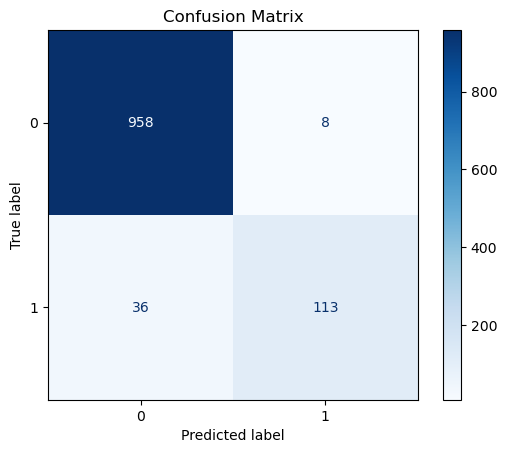

In [71]:
evaluate_model(best_model_tfidf)

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

vectotizer = CountVectorizer()

best_model_cv = find_best_model(vectotizer)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
{'rf__max_depth': 20, 'rf__n_estimators': 20, 'vectorizer__max_df': 0.5, 'vectorizer__min_df': 0.01, 'vectorizer__ngram_range': (1, 2)}


              precision    recall  f1-score   support

           0     0.9638    0.9917    0.9776       966
           1     0.9339    0.7584    0.8370       149

    accuracy                         0.9605      1115
   macro avg     0.9488    0.8751    0.9073      1115
weighted avg     0.9598    0.9605    0.9588      1115



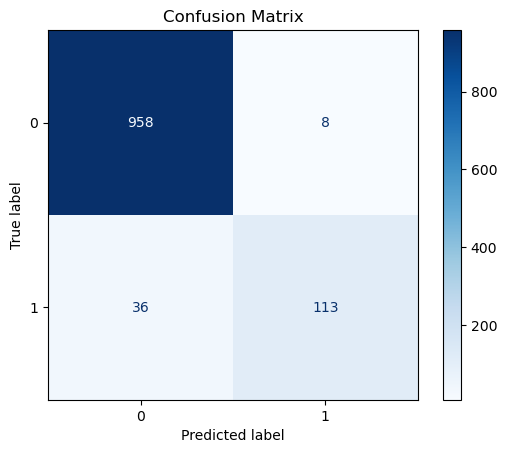

In [73]:
evaluate_model(best_model_cv)

Wyniki otrzymane przy zastosowaniu dwóch wektoryzatorów są dokłądnie takie same. F-1 score na poziomie 0,96, problem z czułością dla spamu, w obu przypadkach 36 próbek zostało błędnie zaklasyfikowanaych jako nie spam. Problem może także  wynikać ze znacznie mniejszej ilści wyników w klasie "nie spam" w stosunku do "spam". Chociaż wyniki finalne są takie same, to optymalne parametry modeli w zalezności od wykorzystango wektoryzatora różnią się miedzy sobą.